Data Analysis of diabetes dataset for women ("Pima Indians Diabetes" dataset) and usage of Machine Learning to process and transform "Pima Indians Diabetes" data to create a prediction model. This model will predict which people are likely to develop diabetes.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Exploration: Load and Review Dataset

In [2]:
diabetes = pd.read_csv('pima_diabetes.csv')

In [3]:
print("Dimensions of the Diabetes dataset: {}".format(diabetes.shape)) 
# Check number of columns (attributes) and rows (instances) in the data frame

Dimensions of the Diabetes dataset: (768, 9)


In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


“Outcome” is the feature we are going to predict, 0 means 'Non-Diabetic', 1 means 'Diabetic'. 

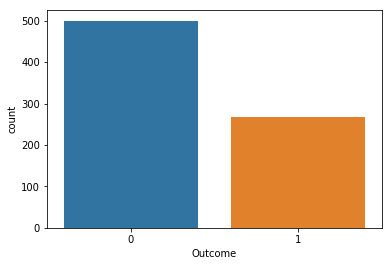

In [5]:
diabetes.groupby('Outcome').size()
sns.countplot(diabetes['Outcome'],label="Count")

We can identify that out of the 768 persons, 500 are labeled as 0 (Non-Diabetic) and 268 as 1 (Diabetic)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000206B622B080>],
      dtype=object)

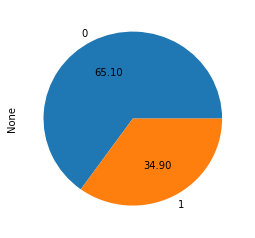

In [6]:
diabetes.groupby('Outcome').size().plot(kind='pie', subplots=True, figsize=(4, 4), autopct='%.2f')


So, 34.90% people in current data set have diabetes and the remaining 65.10% do not have diabetes.
Its a good distribution True/False cases of diabetes in data.


Identifying correlation in data graphically:

In [7]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

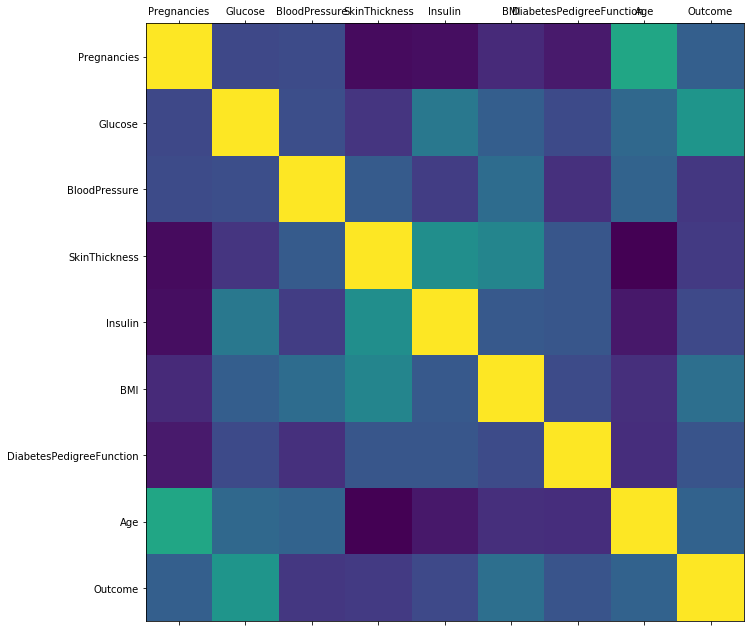

In [8]:
plot_corr(diabetes)

In the above visualization plot, yellow colour represents maximum correlation and blue colour represents minimum correlation. We can see none of the variable have proper correlation with any of the other variables.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000206B72C4D30>,
      dtype=object)

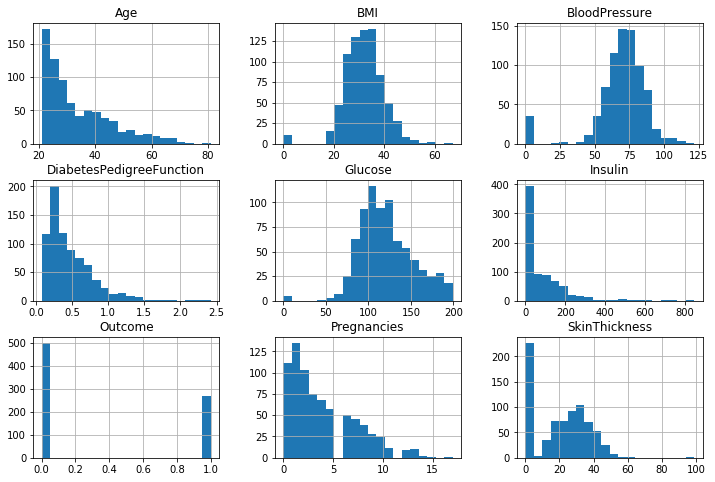

In [9]:
diabetes.hist(figsize=(12,8),bins=20)

# Data Cleaning

Checking if there are Missing or Null Datapoints

In [10]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


We can see that there are no missing or null datapoints. 
Moreover, all the datapoints are numbers.

The dataset does not have any missing/null datapoints. But there can be a lot of entries with 0 values. They can be removed or filled in with means.

Further Data Cleaning is effectively done through the WEKA tool.

Loading the cleaned dataset:

In [11]:
diabetes = pd.read_csv('pima_diabetes_cleaned.csv')

In [12]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


Note that there are no zero values in the dataframe now.

# Feature Engineering

Feature engineering enables to highlight the important features and facilitate to bring domain expertise on the problem to the table. It also allows to avoid overfitting the model despite providing many input features

By a crude observation we can say that the ‘Skin Thickness’ is not an indicator of diabetes. But we can’t deny the fact that it is unusable at this point.

Therefore we will use all the features available. We separate the data set into features and the response that we are going to predict. We will assign the features to the X variable and the response to the y variable.

In [13]:
feature_names = ['Pregnancies',
                 'Glucose',
                 'BloodPressure',
                 'SkinThickness',
                 'Insulin',
                 'BMI',
                 'DiabetesPedigreeFunction',
                 'Age']

X = diabetes[feature_names]
y = diabetes.Outcome

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
array = diabetes.values
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 1)
fit = rfe.fit(X, y)
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
print("Num Features: ",fit.n_features_)
print("Selected Features: ", fit.support_)
print(names)
print("Feature Ranking: ", fit.ranking_)

Num Features:  1
Selected Features:  [False False False False False False  True False]
['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
Feature Ranking:  [2 4 5 8 7 3 1 6]


# Model Selection: Comparison of Calibration of Classifiers

It is the phase where we select the model whose caliberation and relaibility estimate performs best for the data set at hand.

First we will be calculating the “Classification Accuracy (Testing Accuracy)” of a given set of classification models with their default parameters to predict which model can perform better with the diabetes data set.

We will import the necessary libraries to the notebook. We import 6 classifiers namely K-Nearest Neighbors, Support Vector Classifier, Logistic Regression, Gaussian Naive Bayes and Random Forest to be contenders for the best classifier.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

C:\Users\Astha\Anaconda2\envs\py36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [15]:
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('ANN', MLPClassifier()))

# Train/Test Split

This method split the data set into two portions : a training set and a testing set. The training set is used to train the model. And the testing set is used to test the model, and evaluate the accuracy.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = diabetes.Outcome, random_state=0)

In [18]:
names = []
scores = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test) #prediction of models
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.723958
1  SVC  0.651042
2   LR  0.791667
3   DT  0.703125
4  GNB  0.750000
5   RF  0.703125
6  ANN  0.729167


Now, the predicted accuracy scores can be plotted using seaborn

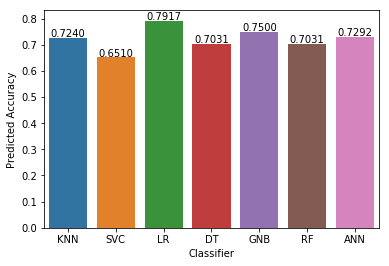

In [19]:
axis = sns.barplot(x = 'Name', y = 'Score', data = tr_split)
axis.set(xlabel='Classifier', ylabel='Predicted Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

We can see that Logistic Regression, Gaussian Naive Bayes, K-Nearest Neighbour and Random Forest have performed better than the rest. 

At the baseline Logistic Regression managed to achieve a classification accuracy of 77.64 %. 
This will be selected as the prime candidate for the next phases. 

Gaussian Naive Bayes, K-Nearest Neighbour and Random Forest can be implemented too.

# Model Building

The k-NN algorithm is arguably the simplest machine learning algorithm. Building the model consists only of storing the training data set. To make a prediction for a new data point, the algorithm finds the closest data points in the training data set — its “nearest neighbors.”

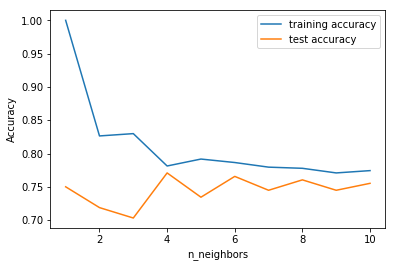

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'], diabetes['Outcome'], stratify=diabetes['Outcome'], random_state=66)

from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

The above plot shows the training and test set accuracy on the y-axis against the setting of n_neighbors on the x-axis. Considering if we choose one single nearest neighbor, the prediction on the training set is perfect. But when more neighbors are considered, the training accuracy drops, indicating that using the single nearest neighbor leads to a model that is too complex. The best performance is somewhere around 9 neighbors.

The plot suggests that we should choose n_neighbors=9. Here we are:

In [25]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.77
Accuracy of K-NN classifier on test set: 0.74


# Naive Bayes Algorithm

In [27]:
from sklearn.naive_bayes import GaussianNB # I am using Gaussian algorithm from Naive Bayes

# Lets creat the model
diab_model = GaussianNB()

diab_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

Performance of the model with training data

In [28]:
diab_train_predict = diab_model.predict(X_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, diab_train_predict)))
print()

Model Accuracy: 0.7517



Performance of the model with testing data

In [29]:
diab_test_predict = diab_model.predict(X_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, diab_test_predict)))
print()

Model Accuracy: 0.7552



The Confusion Matrix and the Classification Report

In [30]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_test, diab_test_predict, labels=[1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, diab_test_predict, labels=[1, 0]))

Confusion Matrix
[[ 44  23]
 [ 24 101]]

Classification Report
             precision    recall  f1-score   support

          1       0.65      0.66      0.65        67
          0       0.81      0.81      0.81       125

avg / total       0.76      0.76      0.76       192



# Logistic Regression Algorithm

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'], diabetes['Outcome'], stratify=diabetes['Outcome'], random_state=66)

In [33]:
from sklearn.linear_model import LogisticRegression
diab_lr_model = LogisticRegression()
diab_lr_model.fit(X_train, y_train.ravel())
lr_test_predict = diab_lr_model.predict(X_test)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_test_predict)))
print("")
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, lr_test_predict, labels=[1, 0]))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_test_predict, labels=[1, 0]))

Model Accuracy: 0.7708

Confusion Matrix
[[ 40  27]
 [ 17 108]]

Classification Report
             precision    recall  f1-score   support

          1       0.70      0.60      0.65        67
          0       0.80      0.86      0.83       125

avg / total       0.77      0.77      0.77       192



# Random Forest Algorithm

The classification is done on the 'Outcome' column, which will be our independent variable. All the other columns will be used as features for the model.

In [5]:
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

In [ ]:
diabetes.drop('Outcome', axis=1)

Using train-test-split to split the data into training data and testing data:

In [6]:
from sklearn.model_selection import train_test_split

# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

Creating the random forest model:

In [7]:
from sklearn import model_selection

# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

# predictions
rfc_predict = rfc.predict(X_test)

Evaluating how the model performs: import cross_val_score, classification_report, and confusion_matrix and run cross-validation to get a better overview of the results:

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

print(rfc.score(X_train, y_train))

print("Confusion Matrix")
print(confusion_matrix(y_test, rfc_predict))
print('\n')

print("Classification Report")
print(classification_report(y_test, rfc_predict))
print('\n')

print("All AUC Scores")

print(rfc_cv_score)
print('\n')

print("Mean AUC Score")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

1.0
Confusion Matrix
[[147  29]
 [ 30  48]]


Classification Report
             precision    recall  f1-score   support

          0       0.83      0.84      0.83       176
          1       0.62      0.62      0.62        78

avg / total       0.77      0.77      0.77       254



All AUC Scores
[0.78481481 0.83296296 0.83777778 0.73703704 0.8262963  0.84888889
 0.84962963 0.90074074 0.8        0.87730769]


Mean AUC Score
('Mean AUC Score - Random Forest: ', 0.8295455840455841)


The confusion matrix is useful for giving you false positives and false negatives. The classification report tells you the accuracy of your model. 

AUC is an abbrevation for area under the curve. It is used in classification analysis in order to determine which of the used models predicts the classes best. It is basically a measure of accuracy.

The ROC curve plots out the true positive rate versus the false positive rate at various thresholds. The roc_auc scoring used in the cross-validation model shows the area under the ROC curve.

We'll evaluate our model’s score based on the roc_auc score, which is 0.787. The next thing is tuning the hyperparameters to see if the performance of the model can be improved.

# Hyperparameter Tuning the Random Forest Model

In [13]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)

# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }

# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the model
rfc_random.fit(X_train, y_train.ravel())

# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 13.3min finished


{'n_estimators': 1400, 'max_features': 'auto', 'max_depth': 340}


The results are: 'n_estimators' = 1200; 'max_features' = 'auto'; 'max_depth': 180. Now these parameters can be plugged back into the model to see whether it improved the performance.

In [14]:
rfc = RandomForestClassifier(n_estimators=1200, max_depth=180, max_features='auto')
rfc.fit(X_train,y_train.ravel())
rfc_predict = rfc.predict(X_test)
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

print("Confusion Matrix")
print(confusion_matrix(y_test, rfc_predict))
print('\n')

print("Classification Report")
print(classification_report(y_test, rfc_predict))
print('\n')

print("All AUC Scores")

print(rfc_cv_score)
print('\n')

print("Mean AUC Score")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

Confusion Matrix
[[147  29]
 [ 30  48]]


Classification Report
             precision    recall  f1-score   support

          0       0.83      0.84      0.83       176
          1       0.62      0.62      0.62        78

avg / total       0.77      0.77      0.77       254



All AUC Scores
[0.77962963 0.83333333 0.83666667 0.73851852 0.82555556 0.8537037
 0.85777778 0.89518519 0.80153846 0.86769231]


Mean AUC Score
('Mean AUC Score - Random Forest: ', 0.8289601139601139)


The output shows that there was a slight improvement in the results. The roc_auc score improved from .787 to .831. The upside is that the number of false positives decreased slightly.

# Checking with different Hypertuning Parameters

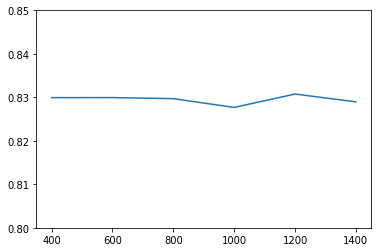

In [31]:
import numpy
from matplotlib import pyplot

x = numpy.array([400,600,800,1000,1200,1400])
y = numpy.array([0.8299330484330485,0.829940170940171,0.8296937321937321,0.8276780626780628,0.8307606837606837,0.8289601139601139])

fig = pyplot.figure()
ax = fig.add_subplot(111)
ax.set_ylim(0.80,0.85)
pyplot.plot(x,y)
pyplot.show()

Clearly, at n_tree = 1200; max_features = 'auto'; max_depth: 180, the AUC score is highest and this, hence, will give the highest accuracy rate

# FINAL RESULTS

In [9]:
models = []
models.append(('LR', 0.77))
models.append(('RF (not tuned)', 0.75))
models.append(('RF (tuned)', 0.76))
models.append(('NB', 0.7532))
names = []
scores = []

for name, accuracy in models:
    scores.append(accuracy)
    names.append(name)
    tb_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tb_split)

             Name   Score
0              LR  0.7700
1  RF (not tuned)  0.7500
2      RF (tuned)  0.7600
3              NB  0.7532


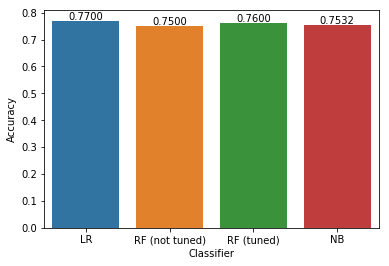

In [10]:
axis = sns.barplot(x = 'Name', y = 'Score', data = tb_split)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

             Name  Specificity
0              LR         0.86
1  RF (not tuned)         0.62
2      RF (tuned)         0.60
3              NB         0.80


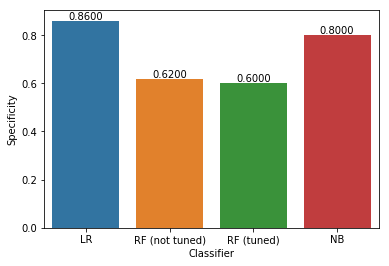

In [4]:
models = []

models.append(('LR', 0.86))

models.append(('RF (not tuned)', 0.62))

models.append(('RF (tuned)', 0.60))

models.append(('NB', 0.80))

names = []

specificity = []



for name, val in models:

    specificity.append(val)

    names.append(name)

    tb_split = pd.DataFrame({'Name': names, 'Specificity': specificity})

print(tb_split)

axis = sns.barplot(x = 'Name', y = 'Specificity', data = tb_split)
axis.set(xlabel='Classifier', ylabel='Specificity')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()


             Name  Sensivitity
0              LR         0.59
1  RF (not tuned)         0.83
2      RF (tuned)         0.84
3              NB         0.64


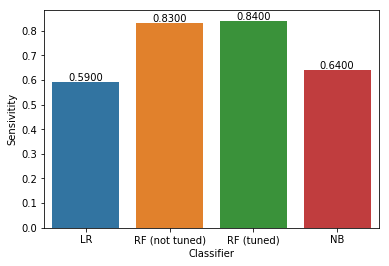

In [5]:
models = []

models.append(('LR', 0.59))

models.append(('RF (not tuned)', 0.83))

models.append(('RF (tuned)', 0.84))

models.append(('NB', 0.64))

names = []

sensivity = []



for name, val in models:

    sensivity.append(val)

    names.append(name)

    tb_split = pd.DataFrame({'Name': names, 'Sensivitity': sensivity})

print(tb_split)

axis = sns.barplot(x = 'Name', y = 'Sensivitity', data = tb_split)
axis.set(xlabel='Classifier', ylabel='Sensivitity')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'], diabetes['Outcome'], stratify=diabetes['Outcome'], random_state=66)

In [8]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.71
Accuracy on test set: 0.67


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.807
Accuracy on test set: 0.792


C:\Users\Astha\Anaconda2\envs\py36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [10]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.910
Accuracy on test set: 0.781


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential() # Initialising the ANN

classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [19]:
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [20]:
classifier.fit(X_train, y_train, batch_size = 1, epochs = 100)

Epoch 1/100
614/614 [==============================] - 3s 6ms/step - loss: 0.6456 - acc: 0.6352
Epoch 2/100
614/614 [==============================] - 1s 2ms/step - loss: 0.5288 - acc: 0.7020
Epoch 3/100
614/614 [==============================] - 1s 2ms/step - loss: 0.4996 - acc: 0.7541
Epoch 4/100
614/614 [==============================] - 1s 2ms/step - loss: 0.4996 - acc: 0.7671
Epoch 5/100
614/614 [==============================] - 1s 2ms/step - loss: 0.4856 - acc: 0.7720
Epoch 6/100
614/614 [==============================] - 1s 2ms/step - loss: 0.4877 - acc: 0.7769
Epoch 7/100
614/614 [==============================] - 1s 2ms/step - loss: 0.4780 - acc: 0.7769
Epoch 8/100
614/614 [==============================] - 1s 2ms/step - loss: 0.4848 - acc: 0.7850
Epoch 9/100
614/614 [==============================] - 1s 2ms/step - loss: 0.4781 - acc: 0.7818
Epoch 10/100
614/614 [==============================] - 1s 2ms/step - loss: 0.4708 - acc: 0.7850
Epoch 11/100
614/614 [=================

In [25]:
from keras.models import load_model
classifier.save('diabetes_neural_model.h5')

In [26]:
y_pred = classifier.predict(X_test)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(accuracy*100)+"%")

[[83 24]
 [ 8 39]]
Accuracy: 79.22077922077922%


In [12]:
diabetes = pd.read_csv('pima_diabetes_cleaned.csv')
diabetes = diabetes.drop(["SkinThickness"], axis=1)
feature_names = ['Pregnancies',
                 'Glucose',
                 'BloodPressure',
                 'Insulin',
                 'BMI',
                 'DiabetesPedigreeFunction',
                 'Age']

X = diabetes[feature_names]
y = diabetes.Outcome
print(diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [13]:
print(diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'], diabetes['Outcome'], stratify=diabetes['Outcome'], random_state=66)

In [15]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.50
Accuracy on test set: 0.52


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.809
Accuracy on test set: 0.802


C:\Users\Astha\Anaconda2\envs\py36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [17]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.875
Accuracy on test set: 0.797


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [48]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential() # Initialising the ANN

classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 7))
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [50]:
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train, y_train, batch_size = 1, epochs = 100)

Epoch 1/100
614/614 [==============================] - 2s 4ms/step - loss: 0.6647 - acc: 0.6336
Epoch 2/100
614/614 [==============================] - 2s 3ms/step - loss: 0.6063 - acc: 0.6401
Epoch 3/100
614/614 [==============================] - 1s 2ms/step - loss: 0.5566 - acc: 0.6401
Epoch 4/100
614/614 [==============================] - 1s 2ms/step - loss: 0.5326 - acc: 0.6857
Epoch 5/100
614/614 [==============================] - 1s 2ms/step - loss: 0.5243 - acc: 0.7492
Epoch 6/100
614/614 [==============================] - 1s 2ms/step - loss: 0.5164 - acc: 0.7573
Epoch 7/100
614/614 [==============================] - 2s 3ms/step - loss: 0.5109 - acc: 0.7606
Epoch 8/100
614/614 [==============================] - 2s 3ms/step - loss: 0.5072 - acc: 0.7638
Epoch 9/100
614/614 [==============================] - ETA: 0s - loss: 0.5052 - acc: 0.774 - 2s 3ms/step - loss: 0.5078 - acc: 0.7720
Epoch 10/100
614/614 [==============================] - 1s 2ms/step - loss: 0.5010 - acc: 0.7720
E

In [51]:
from keras.models import load_model
classifier.save('diabetes_neural_model.h5')

y_pred = classifier.predict(X_test)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(accuracy*100)+"%")

[[93 14]
 [13 34]]
Accuracy: 82.46753246753246%
